# Fraunhofer diffraction

Considering the experimental setup used for this experiment

<img src="diffraction_picture.jpg" width="600">

which can be modeled as (from above, not in scale):

<img src="diffraction_scheme.png" width="600">

The raw data look something like

<img src="raw_data_1.jpg" width="600">


### Comment: validity of Fraunhofer approximation

In optics, the Fraunhofer diffraction equation is used to model the diffraction of waves when the diffraction pattern is viewed at a long distance from the diffracting object. In contrast, the diffraction pattern created near the object, in the near field region, is given by the Fresnel diffraction equation. 

The **far-field** condition that must be fulfilled in order to use the Fraunhofer diffraction is

\begin{equation}
\frac{d^2}{\lambda L} \ll 1,
\end{equation}

where $d$ is the typical geometrical dimension of the diffracting object (i.e. the aperture or slit size), $\lambda$ is the wavelenght of the light and $L$ is the distance of the screeen from the aperture.

The above condition is realized when the distance between the aperture and the plane of observation (on which the diffracted pattern is observed) is large enough so that the optical path lengths from edges of the aperture to a point of observation differ much less than the wavelength of the light. In this condition the propagation paths for individual wavelets from every point on the aperture to the point of observation can be treated as parallel.

In [1]:
# Notebook magic
%matplotlib notebook

# Import the packages that are needed
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Use latex for labels
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern']})
rc('text', usetex=True)

# Define custom colormap
from matplotlib.colors import LinearSegmentedColormap, LogNorm
colors = [(0, 0, 0), (0.396, 1, 0)]  # black -> green
n_bins = 1000
cmap_name = '532nm_laser'

# Create the colormap
my_cm = LinearSegmentedColormap.from_list(cmap_name, colors)

In [2]:
# Check if we are in the Fraunhofer condition
lamb = 532e-9    # [m] nominal
L = 1    # [m] typical
d = 0.4e-3    # [m] maximum

print('The value of the Fraunhofer parameter is: ')
print(d**2 / (L * lamb))

The value of the Fraunhofer parameter is: 
0.3007518796992481


# 1. Single slit

Given that the slit has width $d$ and height much bigger than the width (so to assume it infinite), the diffracted light will have intensity 

\begin{equation}
I = I_0 \left\lbrace\frac{\sin\left[\frac{\pi d \sin(\theta)}{\lambda}\right]}{\frac{\pi d \sin(\theta)}{\lambda}}\right\rbrace^2 = I_0 \mathrm{sinc}^2\left[\frac{d \sin(\theta)}{\lambda}\right], 
\end{equation}

where the sinc function is defined as $\mathrm{sinc}(y) = \frac{\sin(\pi y)}{\pi y}$ and $\theta$ is the angle measured on the screen, i.e.

\begin{equation}
\theta = \tan\left(\frac{x}{L}\right)
\end{equation}

The minima of diffraction are found when the argument of the normalized sinc function is an integer, therefore:

\begin{equation}
    \mbox{Minima:}\qquad \frac{d \sin(\theta)}{\lambda} = j\qquad\mbox{where}\qquad j =\pm 1, \pm 2, \ldots 
\end{equation}

The maxima are found when the the argument of the normalized sinc function is half-integer, therefore:

\begin{equation}
    \mbox{Maxima:}\qquad \frac{d \sin(\theta)}{\lambda} = \frac{j}{2}\qquad\mbox{where}\qquad j =\pm 1, \pm 2, \ldots 
\end{equation}


<IPython.core.display.Javascript object>


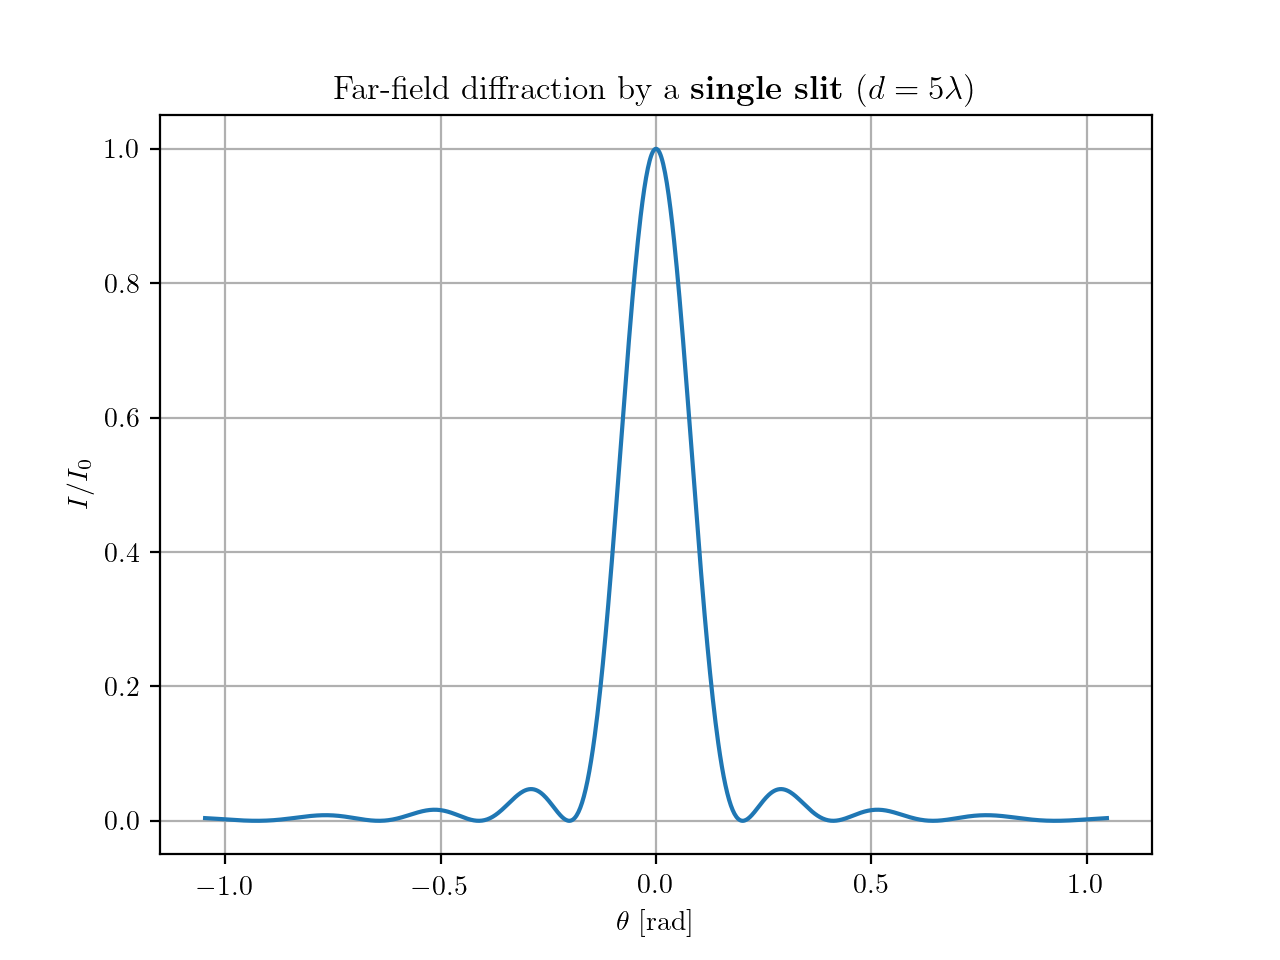

<IPython.core.display.Javascript object>


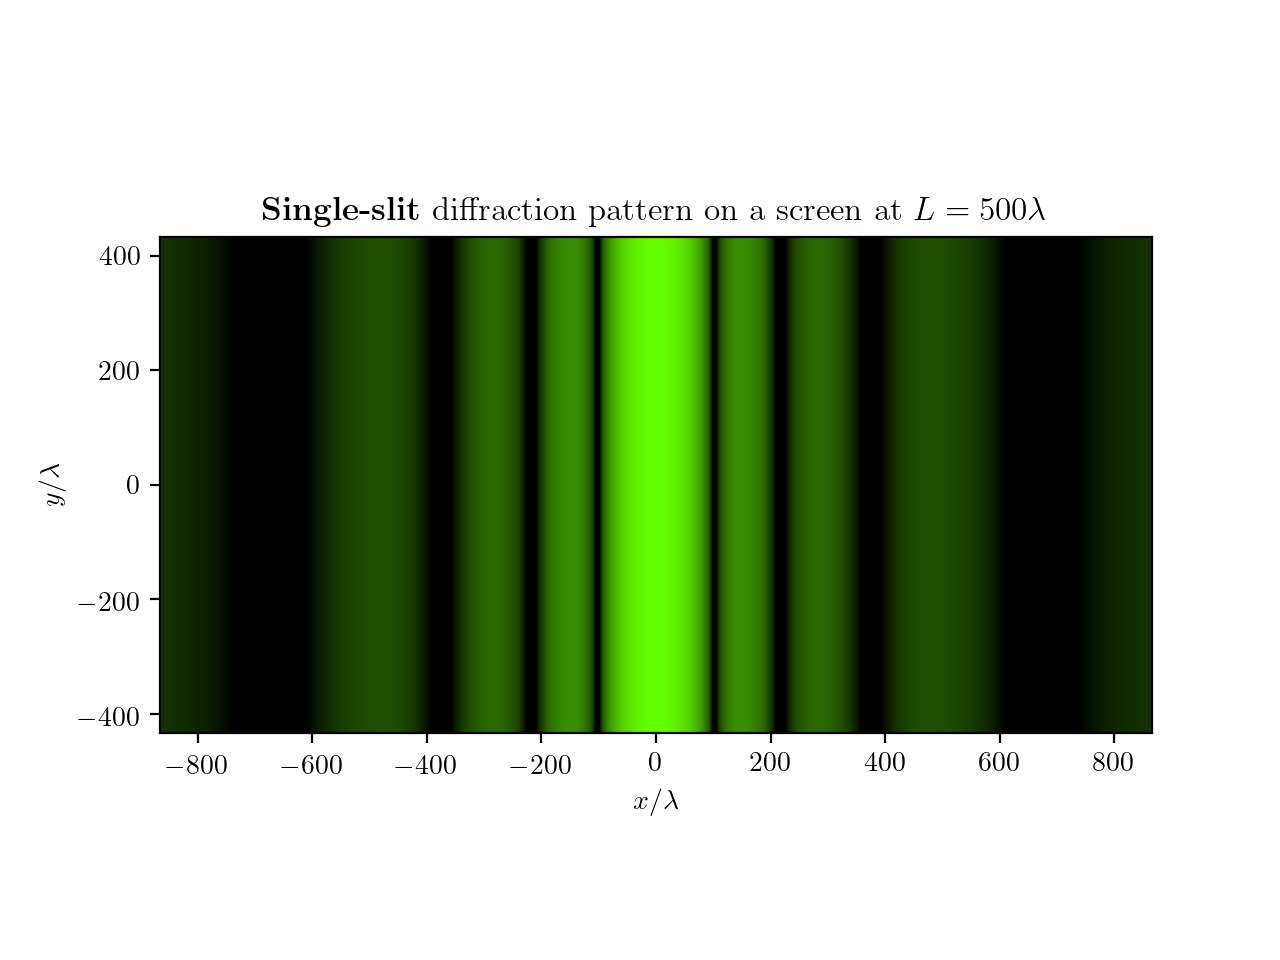

In [3]:
# Plot of the intensity profile
lamb = 1
d = 5 * lamb
L = 500 * lamb    # Distance of the screen to the diffracting object

theta = np.linspace(-np.pi/3, np.pi/3, 1001)
x_screen = np.linspace(np.tan(-np.pi/3), np.tan(np.pi/3) , 1001) * L

# Compute intensities
I0 = 1
I = I0 * (np.sinc(d * np.sin(theta) / lamb))**2 

plt.figure()
plt.plot(theta, I / I0)
plt.ylabel('$I / I_0$')
plt.xlabel(r'$\theta$ [rad]')
plt.title(r'Far-field diffraction by a \textbf{single slit} ($d=5\lambda$)')
plt.grid()
plt.show()
#plt.savefig('single_slit_intensity.pdf')

# Plot of what you actually see on the screen
I_screen = I0 * (np.sinc(d * np.sin(np.arctan(x_screen / L)) / lamb))**2

matrix_intensity = np.outer(np.ones((1,501)), I_screen)

plt.figure()
# Plot the image with a log normalization to imitate what the eyes actually see
plt.imshow(matrix_intensity / I0, cmap=my_cm, origin='lower', interpolation='None', norm=LogNorm(vmin=0.001, vmax=1), 
           extent = [np.min(x_screen) / lamb, np.max(x_screen) / lamb, 0.5 * np.min(x_screen) / lamb, 
                     0.5 * np.max(x_screen) / lamb])

plt.title(r'\textbf{Single-slit} diffraction pattern on a screen at $L=500\lambda$')
plt.xlabel(r'$x/\lambda$')
plt.ylabel(r'$y/\lambda$')
plt.show()

<IPython.core.display.Javascript object>


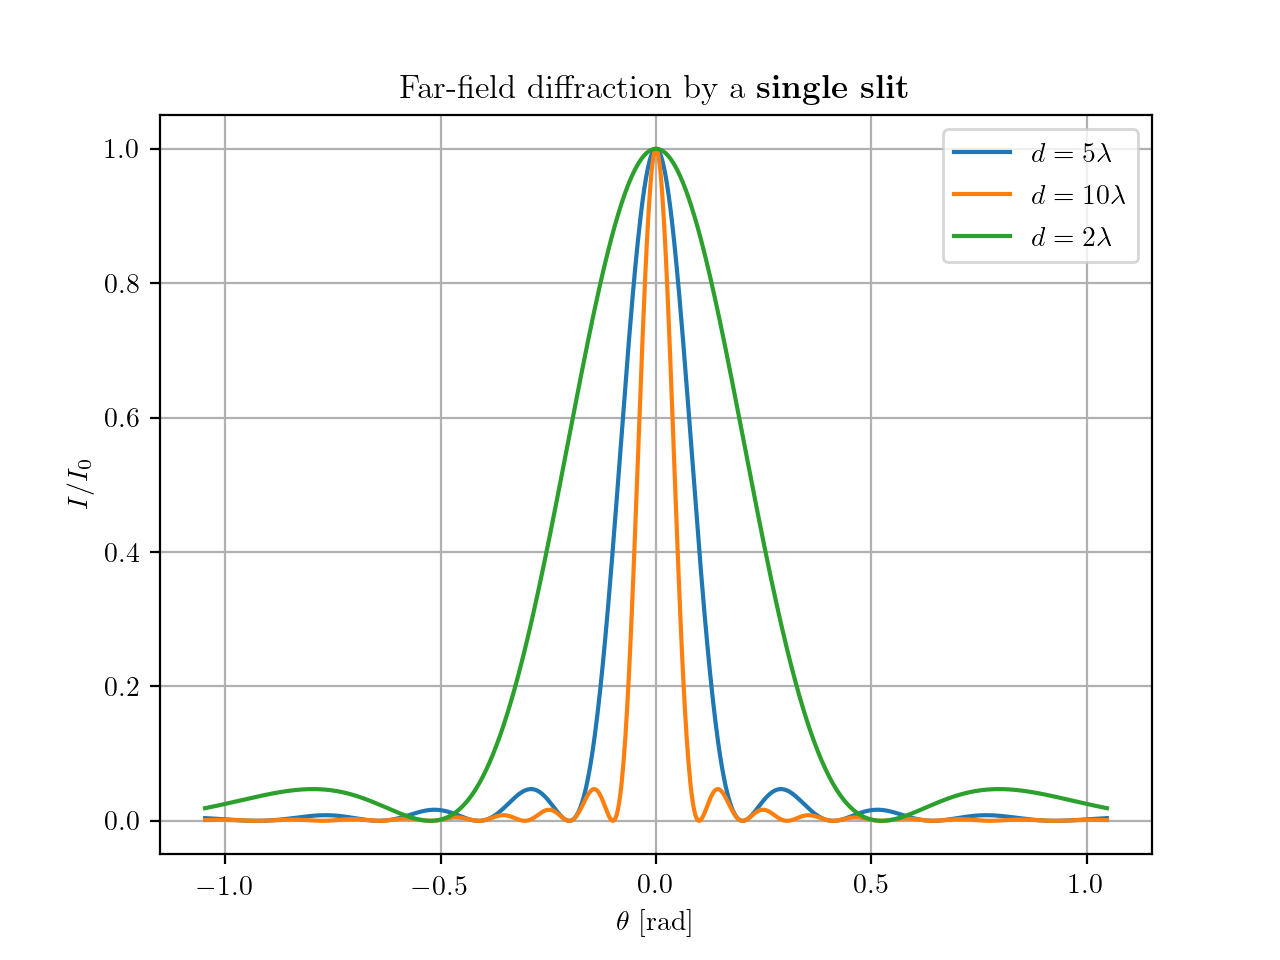

In [4]:
# Comparison between different slits
# Plot of the intensity profile
lamb = 1
d1 = 5 * lamb
d2 = 10 *lamb
d3 = 2 * lamb

theta = np.linspace(-np.pi/3, np.pi/3, 1001)

# Compute intensities
I0 = 1
I1 = I0 * (np.sinc(d1 * np.sin(theta) / lamb))**2 
I2 = I0 * (np.sinc(d2 * np.sin(theta) / lamb))**2
I3 = I0 * (np.sinc(d3 * np.sin(theta) / lamb))**2 

plt.figure()
plt.plot(theta, I1 / I0, label=r'$d=5\lambda$')
plt.plot(theta, I2 / I0, label=r'$d=10\lambda$')
plt.plot(theta, I3 / I0, label=r'$d=2\lambda$')

plt.ylabel('$I / I_0$')
plt.xlabel(r'$\theta$ [rad]')
plt.title(r'Far-field diffraction by a \textbf{single slit}')
plt.grid()
plt.legend()
plt.show()
#plt.savefig('single_slit_intensity_comparison.pdf')

## Measuring the laser wavelength

The minima of diffraction from a single slit are found at 

\begin{equation}
    \mbox{Minima:}\qquad \frac{d \sin(\theta)}{\lambda} = j\qquad\mbox{where}\qquad j =\pm 1, \pm 2, \ldots 
\end{equation}

Therefore one can recover the wavelength of the laser with the following linear relation

\begin{equation}
    d\sin(\theta) = j \lambda\qquad \longrightarrow \qquad \underbrace{d\sin\left[\tan\left(\frac{x}{L}\right)\right]}_y = j \lambda
\end{equation}

The wavelength $\lambda$ can be obtained as the slope of the linear fit.

<IPython.core.display.Javascript object>


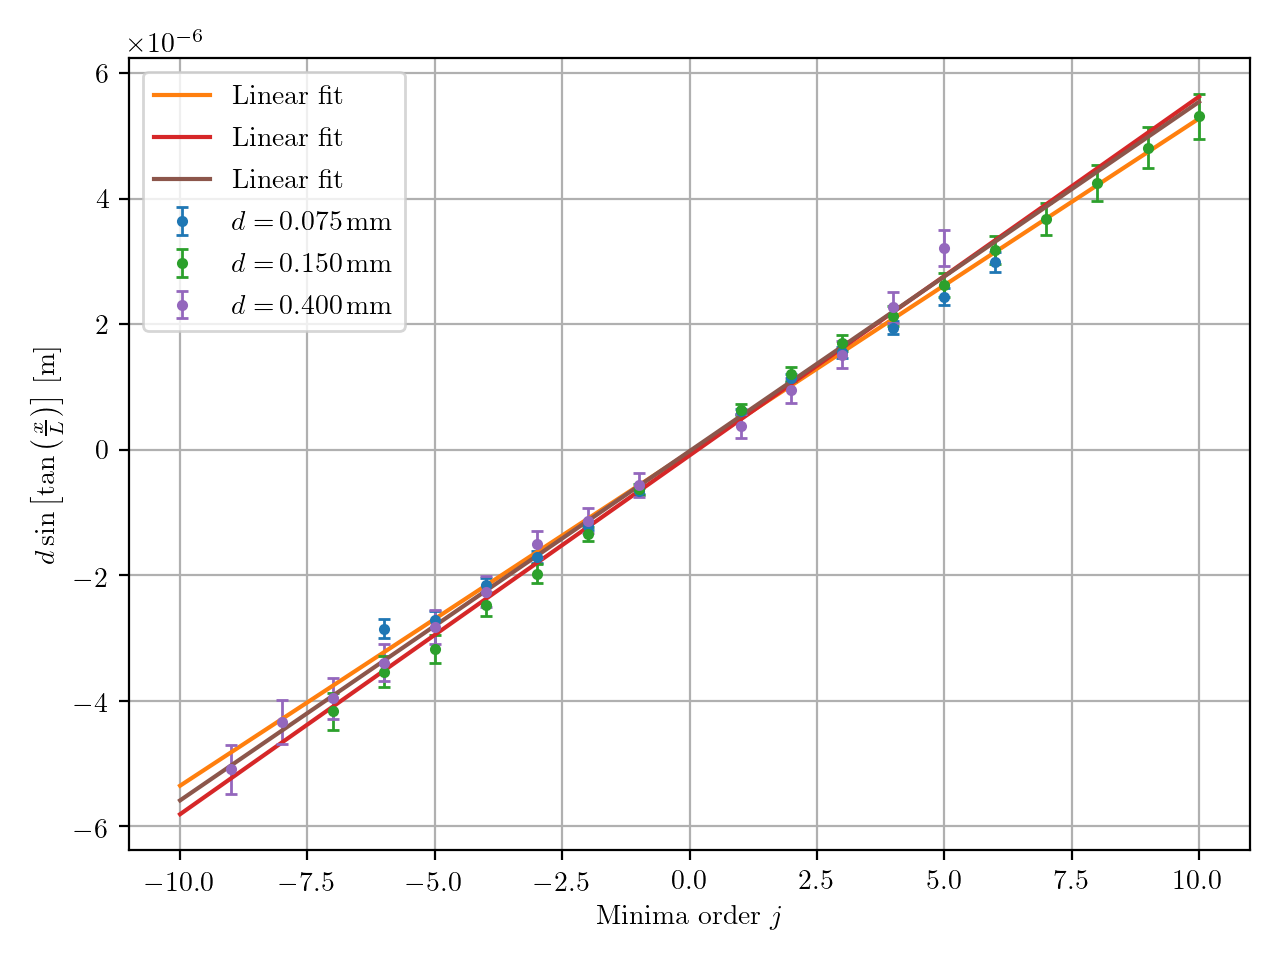

In [5]:
# Single slits

# The data
L = 1e-2 * np.array([135.4, 106, 106])     # [m] distance from the screeen
err_L = 0.5e-2    # [m]
d_array = 1e-3 * np.array([0.075, 0.15, 0.4])    # [m] array with the widths of the slits

order_min_array = [np.arange(-6, 7), np.arange(-7, 11), np.arange(-9, 6)]    # array of the order of the diffraction minima
order_min_array = [i[i!=0] for i in order_min_array]    # remove order 0, which are no minima of diffraction but maxima

x_array = [1e-2 * np.array([-5.15, -4.9, -3.9, -3.1, -2.2, -1.2, 1.1, 2.05, 2.8, 3.5, 4.4, 5.4]), 
           1e-2 * np.array([-2.95, -2.5, -2.25, -1.75, -1.4, -.95, -.45, .45, .85, 1.2, 1.5, 1.85, 2.25, 2.6, 3, 3.4, 3.75]),
           1e-3 * np.array([-13.5, -11.5, -10.5, -9, -7.5, -6, -4, -3, -1.5, 1, 2.5, 4, 6, 8.5])]  
           # [m] array of positions on the screen
err_x = 0.5e-3    # [m]

# This is the quantity that we want to fit
y_values = [d_array[i] * np.sin(np.tan(x_array[i] / L[i])) for i in range(len(d_array))]
err_y = [d_array[i] * np.sqrt(((np.cos(np.tan(x_array[i] / L[i])) / np.cos(x_array[i] / L[i])**2) / L[i])**2 * err_x**2 + 
         + ((x_array[i] * np.cos(np.tan(x_array[i] / L[i])) /  np.cos(x_array[i] / L[i])**2) / L[i]**2) ** 2 * err_L) 
         for i in range(len(d_array))]

# Variables in which we store the results of the fits
popt_array = []
pcov_array = []

plt.figure()
for i in range(len(d_array)):
    plt.errorbar(order_min_array[i], y_values[i], yerr=err_y[i], marker='.', capsize=2, 
                 elinewidth=1, markeredgewidth=1, linestyle='', label=r'$d=\,$%.3f$\,\mbox{mm}$' % (1e3 * d_array[i]))

    popt, pcov = np.polyfit(order_min_array[i], y_values[i], 1, w=1/err_y[i], cov='unscaled')
    
    # Place result of the fit in the arrays defined above
    popt_array.append(popt)
    pcov_array.append(pcov)
    
    plt.plot(np.linspace(-10, 10), popt[0] * np.linspace(-10, 10) + popt[1], label='Linear fit')

plt.xlabel(r'Minima order $j$')
plt.ylabel(r'$d\sin\left[\tan\left(\frac{x}{L}\right)\right]$ [m]')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
print('******************** RESULTS ********************\n')
for i in range(len(popt_array)):
    print('+++++++++++++++++++++ Fit %d +++++++++++++++++++++' % i)
    print('The optimal parameters (with 68% confidence) are:')
    print('Wavelength [m]: %e +/- %e' % (popt_array[i][0], np.sqrt(pcov_array[i][0,0])))
    print('Intercept [m]: %e +/- %e\n' % (popt_array[i][1], np.sqrt(pcov_array[i][1,1])))

******************** RESULTS ********************

+++++++++++++++++++++ Fit 0 +++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Wavelength [m]: 5.316482e-07 +/- 8.656619e-09
Intercept [m]: -4.139226e-08 +/- 2.177623e-08

+++++++++++++++++++++ Fit 1 +++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Wavelength [m]: 5.717989e-07 +/- 1.061737e-08
Intercept [m]: -9.420156e-08 +/- 3.653128e-08

+++++++++++++++++++++ Fit 2 +++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Wavelength [m]: 5.566176e-07 +/- 1.688192e-08
Intercept [m]: -2.572849e-08 +/- 6.659619e-08



# 2. Double slit

Assuming that the slits have width $d$ and their separation distance is $s$, both or which are assumed to be much smaller than the height (so to assume it infinite), the diffracted light will have intensity 

\begin{equation}
I = I_0 \underbrace{\mathrm{sinc}^2\left[\frac{d \sin(\theta)}{\lambda}\right]}_{\mbox{Single slit envelope}}\cos^2\left[\frac{\pi s \sin(\theta)}{\lambda}\right]
\end{equation}

<IPython.core.display.Javascript object>


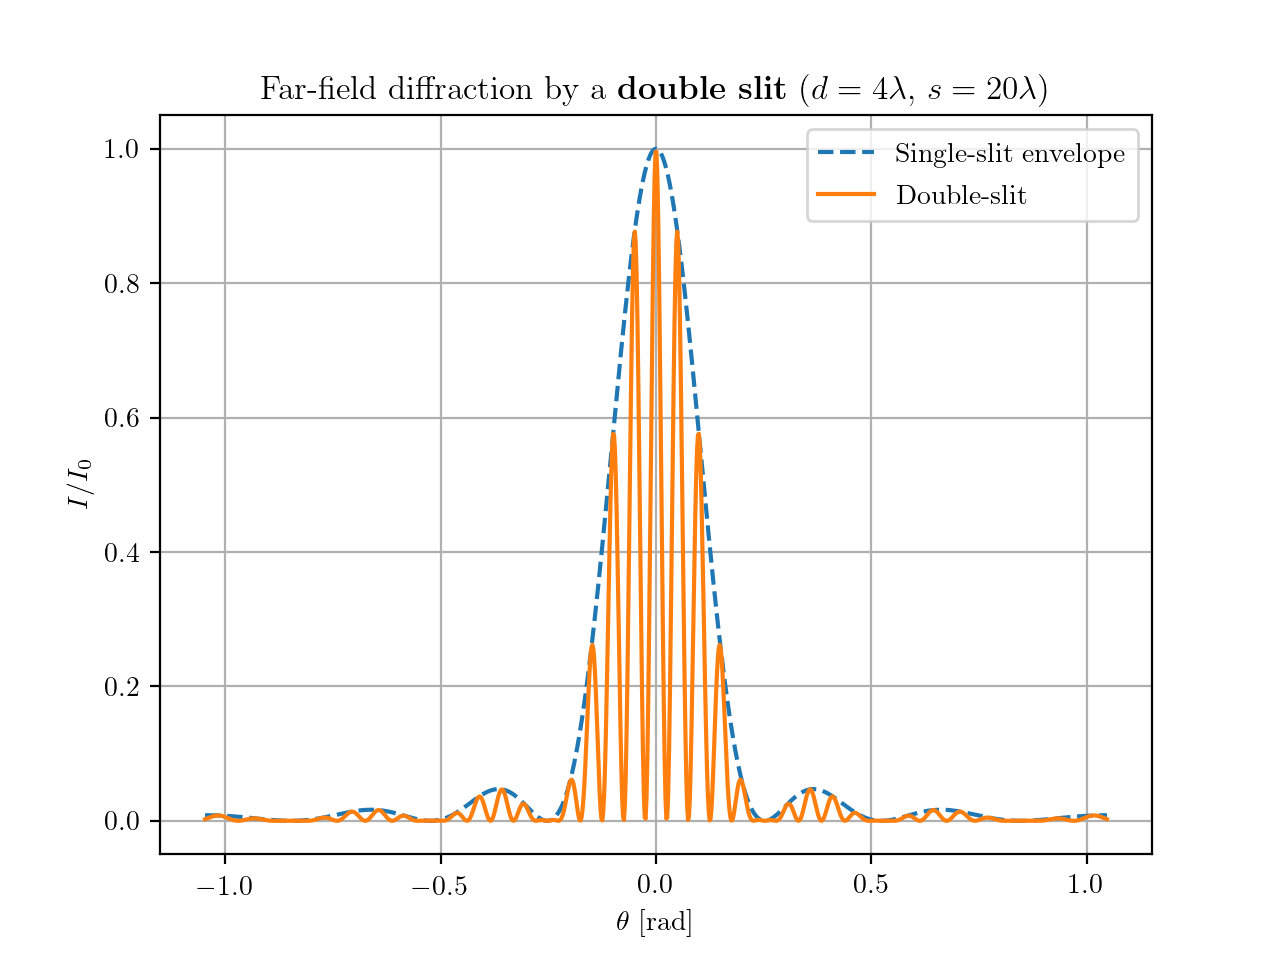

<IPython.core.display.Javascript object>


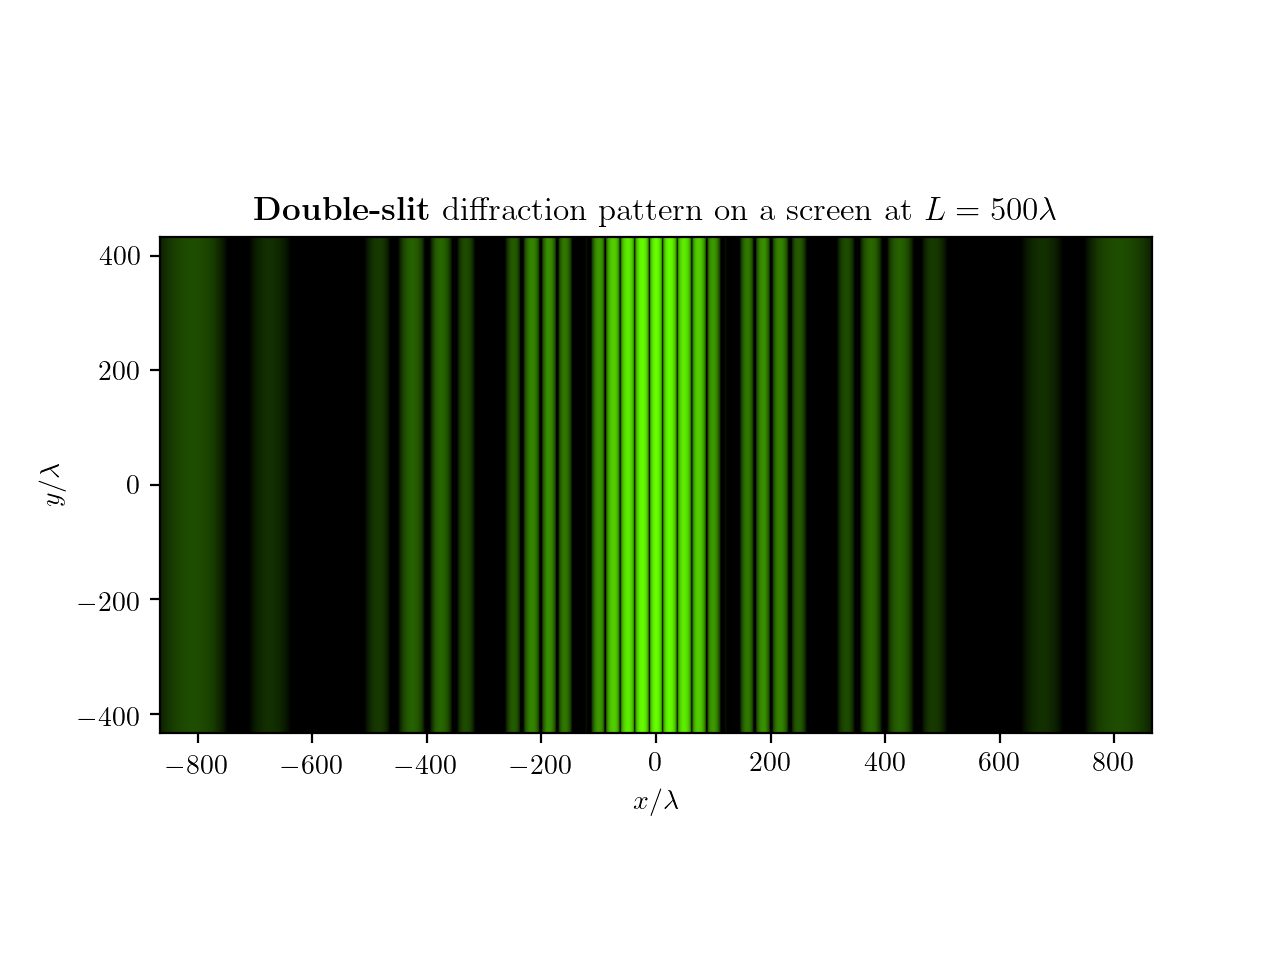

In [7]:
# Plot of the intensity profile
lamb = 1
d = 4 * lamb
s = 20 * lamb
L = 500 * lamb    # Distance of the screen to the diffracting object

theta = np.linspace(-np.pi/3, np.pi/3, 1000)
x_screen = np.linspace(np.tan(-np.pi/3), np.tan(np.pi/3) , 1001) * L

I0 = 1

I = I0 * (np.sinc(d * np.sin(theta) / lamb))**2 * np.cos(np.pi * s * np.sin(theta) / lamb)**2
envelope = I0 * (np.sinc(d * np.sin(theta) / lamb))**2

plt.figure()
plt.plot(theta, envelope / I0, linestyle='--', label='Single-slit envelope')
plt.plot(theta, I / I0, label='Double-slit')
plt.ylabel('$I / I_0$')
plt.xlabel(r'$\theta$ [rad]')
plt.title(r'Far-field diffraction by a \textbf{double slit} ($d=4\lambda$, $s=20\lambda$)')
plt.grid()
plt.legend()
plt.show()
#plt.savefig('double_slit_intensity.pdf')


# Plot of what you actually see on the screen
I_screen = I0 * (np.sinc(d * np.sin(np.arctan(x_screen / L)) / lamb))**2 \
           * np.cos(np.pi * s * np.sin(np.arctan(x_screen / L)) / lamb)**2

matrix_intensity = np.outer(np.ones((1,501)), I_screen)

plt.figure()
# Plot the image with a log normalization to imitate what the eyes actually see
plt.imshow(matrix_intensity / I0, cmap=my_cm, origin='lower', interpolation='None', norm=LogNorm(vmin=0.001, vmax=1), 
           extent = [np.min(x_screen) / lamb, np.max(x_screen) / lamb, 0.5 * np.min(x_screen) / lamb, 
                     0.5 * np.max(x_screen) / lamb])

plt.title(r'\textbf{Double-slit} diffraction pattern on a screen at $L=500\lambda$')
plt.xlabel(r'$x/\lambda$')
plt.ylabel(r'$y/\lambda$')
plt.show()

<IPython.core.display.Javascript object>


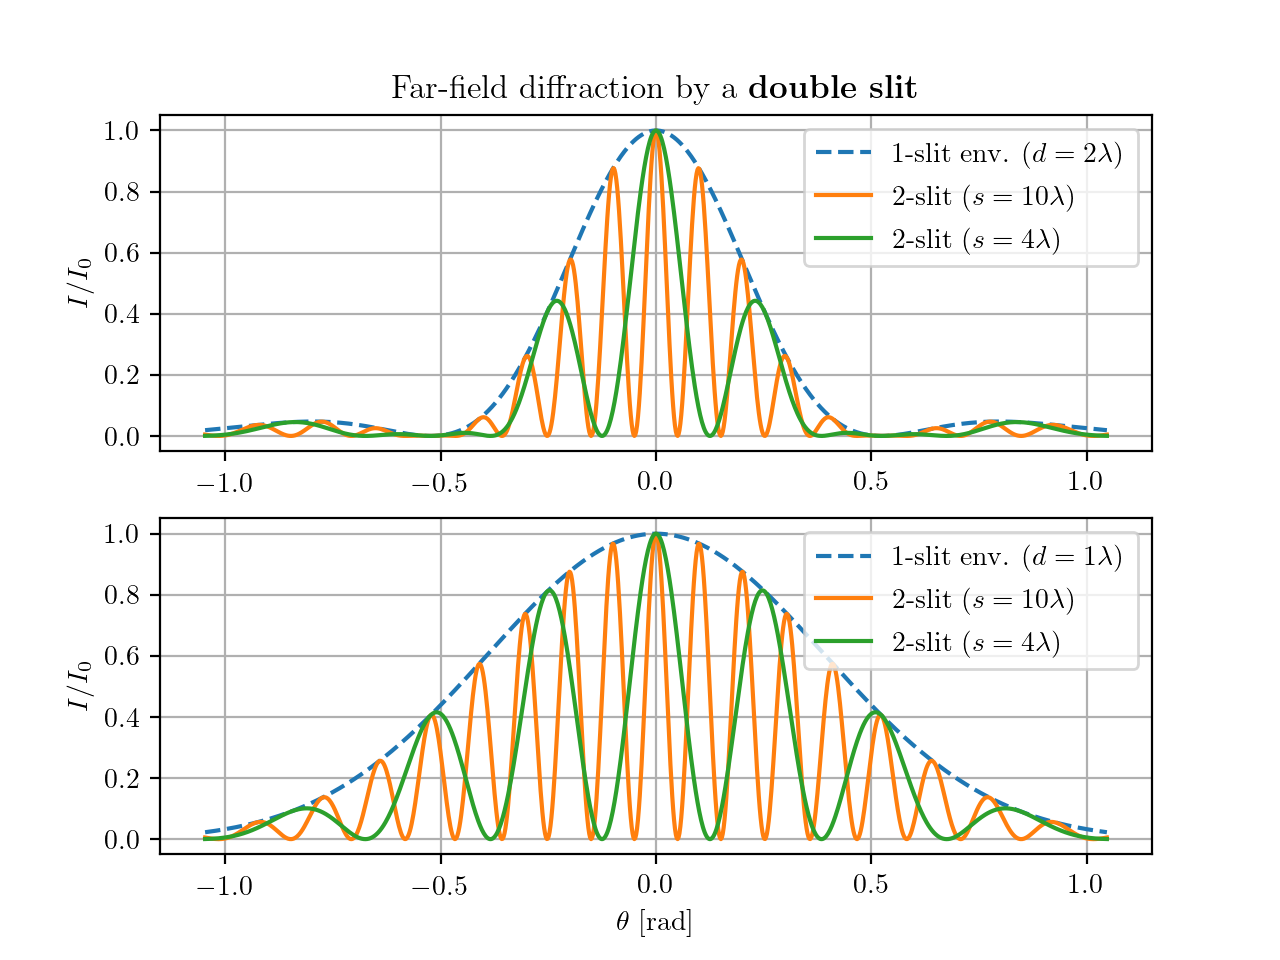

In [8]:
# Comparison varying some of the parameters
lamb = 1

s1 = 10 * lamb
s2 = 4 * lamb

d1 = 2 * lamb
d2 = 1 * lamb

theta = np.linspace(-np.pi/3, np.pi/3, 1001)

# Compute intensities
I0 = 1

I11 = I0 * (np.sinc(d1 * np.sin(theta) / lamb))**2 * np.cos(np.pi * s1 * np.sin(theta) / lamb)**2
I12 = I0 * (np.sinc(d1 * np.sin(theta) / lamb))**2 * np.cos(np.pi * s2 * np.sin(theta) / lamb)**2
I21 = I0 * (np.sinc(d2 * np.sin(theta) / lamb))**2 * np.cos(np.pi * s1 * np.sin(theta) / lamb)**2
I22 = I0 * (np.sinc(d2 * np.sin(theta) / lamb))**2 * np.cos(np.pi * s2 * np.sin(theta) / lamb)**2

envelope1 = I0 * (np.sinc(d1 * np.sin(theta) / lamb))**2
envelope2 = I0 * (np.sinc(d2 * np.sin(theta) / lamb))**2


plt.figure()
ax1 = plt.subplot(2, 1, 1)
plt.plot(theta, envelope1 / I0, linestyle='--', label=r'1-slit env. ($d=2\lambda$)')
plt.plot(theta, I11 / I0, label='2-slit ($s=10\lambda$)')
plt.plot(theta, I12 / I0, label='2-slit ($s=4\lambda$)')

plt.ylabel('$I / I_0$')
plt.title(r'Far-field diffraction by a \textbf{double slit}')
plt.grid()
plt.legend()

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(theta, envelope2 / I0, linestyle='--', label=r'1-slit env. ($d=1\lambda$)')
plt.plot(theta, I21 / I0, label='2-slit ($s=10\lambda$)')
plt.plot(theta, I22 / I0, label='2-slit ($s=4\lambda$)')

plt.ylabel('$I / I_0$')
plt.xlabel(r'$\theta$ [rad]')
plt.grid()
plt.legend()
plt.show()
#plt.savefig('double_slit_intensity_comparison.pdf')

## Estimate the geometrical parameters of a double slit

The minima of diffraction due to the envelope are found again at

\begin{equation}
    \mbox{Minima (envelope):}\qquad \frac{d \sin(\theta)}{\lambda} = j\qquad\mbox{where}\qquad j =\pm 1, \pm 2, \ldots 
\end{equation}

Therefore one can recover the width $d$ of the slits with the following linear relation

\begin{equation}
    \frac{1}{\lambda}\sin(\theta) = \frac{1}{d}\,j\qquad \longrightarrow \qquad \underbrace{\frac{1}{\lambda}\sin\left[\tan\left(\frac{x}{L}\right)\right]}_y = \frac{1}{d}\,j
\end{equation}

We decided to use this formulation so to have the quantity with the uncertainties on the $y$-axis.
The width $d$ of the slits can be obtained as the inverse of slope of the linear fit.

The minima of diffraction due to the interference function (cosine term) are found at

\begin{equation}
    \mbox{Minima:}\qquad \frac{\pi s \sin(\theta)}{\lambda} = \left(j+\frac{1}{2}\right)\pi\qquad\mbox{where}\qquad j =0\pm 1, \pm 2, \ldots 
\end{equation}

Therefore one can recover the separation $s$ between the slits with the following linear relation

\begin{equation}
    \frac{1}{\lambda}\sin(\theta) = \frac{1}{s}\left(j+\frac{1}{2}\right)\qquad \longrightarrow \qquad \underbrace{\frac{1}{\lambda}\sin\left[\tan\left(\frac{x}{L}\right)\right]}_{y} = \frac{1}{s}\left(j+\frac{1}{2}\right)
\end{equation}

The separation $s$ between the slits can be obtained as the inverse of slope of the linear fit.

**Remember** the formula for the propagation of uncertainty for the reciprocal

\begin{equation}
\frac{\sigma_A}{A} = \frac{\sigma_{1/A}}{1/A}\qquad\longrightarrow\qquad\sigma_{1/A} = \frac{\sigma_A}{A^2}
\end{equation}

<IPython.core.display.Javascript object>


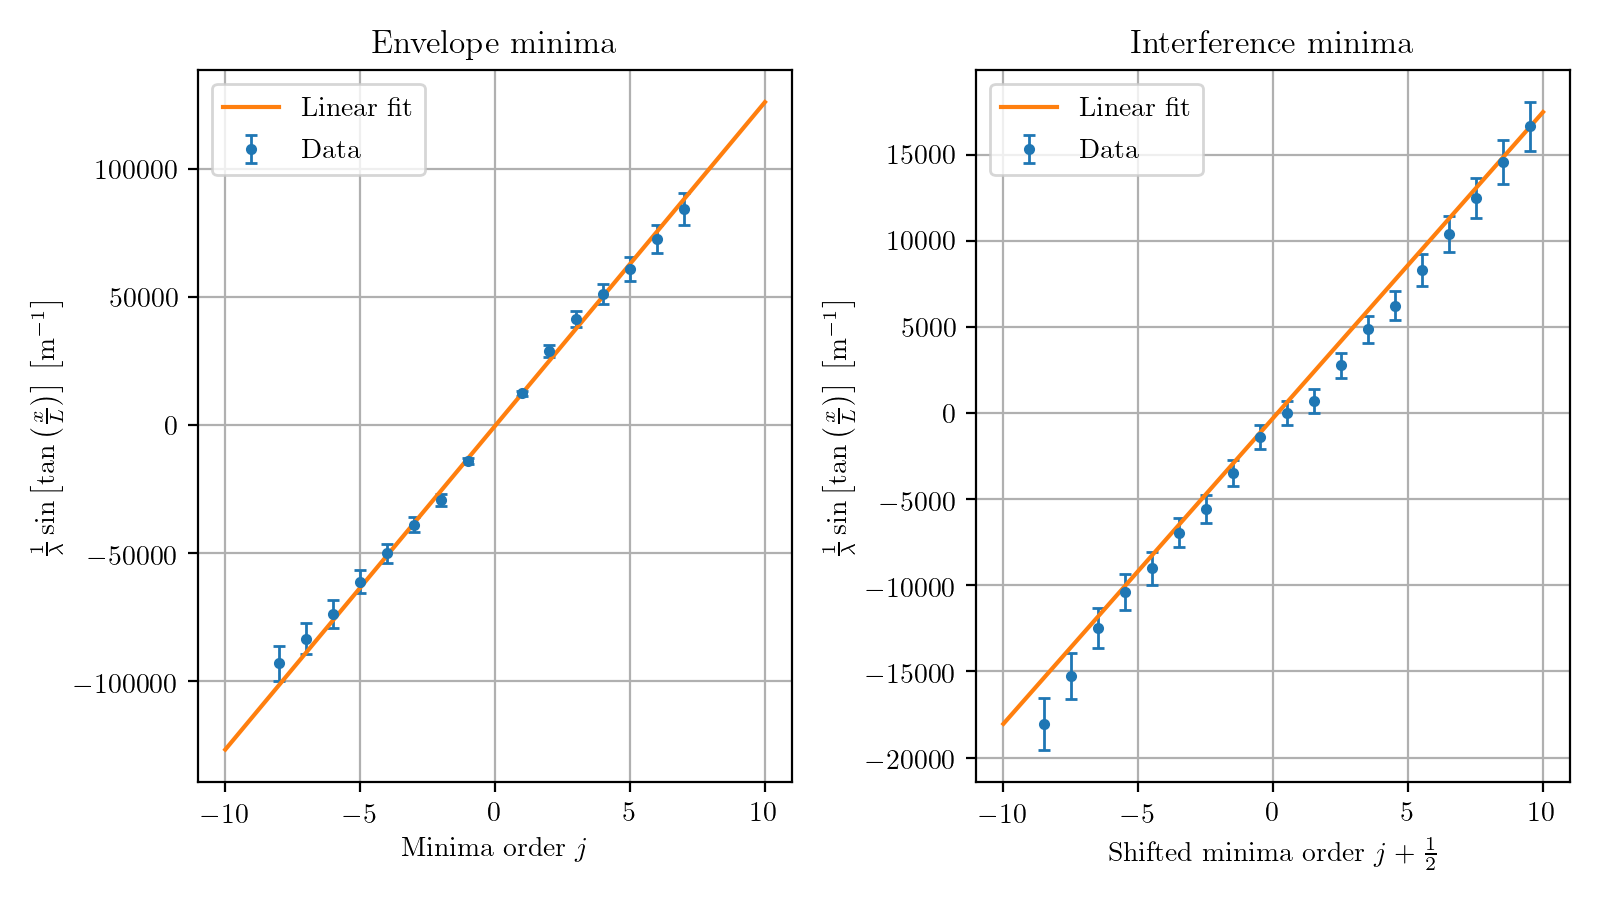

In [14]:
L = 135.4 * 1e-2    # [m] distance to the screen

err_L = 1e-2    # [m]

nominal_lamb = 532.4e-9    # [m] nominal wavelength
nominal_d = 0.1e-3    # [m] nominal width of the slits
nominal_s = 0.4e-3    # [m] nominal separation between the slits

# Minima
order_minima_env = np.arange(-8, 8)
order_minima_env = order_minima_env[order_minima_env != 0]    # remove order 0, which are no minima of diffraction but maxima

minima_env = 1e-2 * np.array([-6.7, -6, -5.3, -4.4, -3.6, -2.8, -2.1, -1, 0.9, 2.1, 3, 3.7, 4.4, 5.25, 6.1])    # [m]

# Minima interference
order_minima_int = np.arange(-9, 10)
minima_int = 1e-3 * np.array([-13, -11, -9, -7.5, -6.5, -5, -4, -2.5, -1, 0, 0.5, 2, 3.5, 4.5, 6, 7.5, 9, 10.5, 12])    # [m]

# Error on minima position
err_minima = 0.5e-3    # [m] we did not see it so much

# Compute y quantity and its uncertainty
# This is the quantity that we want to fit
y_values_env = 1/nominal_lamb * np.sin(np.tan(minima_env / L))
err_y_env = 1/nominal_lamb * np.sqrt(((np.cos(np.tan(minima_env / L))/np.cos(minima_env / L)**2) / L)**2* err_minima**2 \
                             + ((minima_env * np.cos(np.tan(minima_env / L)) / np.cos(minima_env/L)**2) / L**2)** 2 * err_L)

# This is the quantity that we want to fit
y_values_int = 1/nominal_lamb * np.sin(np.tan(minima_int / L))
err_y_int = 1/nominal_lamb * np.sqrt(((np.cos(np.tan(minima_int / L))/np.cos(minima_int / L)**2) / L)**2* err_minima**2 \
                             + ((minima_int * np.cos(np.tan(minima_int / L)) / np.cos(minima_int/L)**2) / L**2)** 2 * err_L)

# Fit envelope
plt.figure(figsize=(8, 4.5))
plt.subplot(1, 2, 1)
plt.title('Envelope minima')
plt.errorbar(order_minima_env, y_values_env, yerr=err_y_env, marker='.', capsize=2, 
             elinewidth=1, markeredgewidth=1, linestyle='', label='Data')

popt_env, pcov_env = np.polyfit(order_minima_env, y_values_env, 1, w=1/err_y_env, cov='unscaled')

plt.plot(np.linspace(-10, 10), popt_env[0] * np.linspace(-10, 10) + popt_env[1], label='Linear fit')

plt.xlabel(r'Minima order $j$')
plt.ylabel(r'$\frac{1}{\lambda}\sin\left[\tan\left(\frac{x}{L}\right)\right]$ $\left[\mbox{m}^{-1}\right]$')

plt.grid()
plt.legend()

# Fit interference
plt.subplot(1, 2, 2)
plt.title('Interference minima')
plt.errorbar(order_minima_int + 0.5, y_values_int, yerr=err_y_int, marker='.', capsize=2, 
             elinewidth=1, markeredgewidth=1, linestyle='', label='Data')

popt_int, pcov_int = np.polyfit(order_minima_int, y_values_int, 1, w=1/err_y_int, cov='unscaled')

plt.plot(np.linspace(-10, 10), popt_int[0] * np.linspace(-10, 10) + popt_int[1], label='Linear fit')

plt.xlabel(r'Shifted minima order $j + \frac{1}{2}$')
plt.ylabel(r'$\frac{1 }{\lambda}\sin\left[\tan\left(\frac{x}{L}\right)\right]$ $\left[\mbox{m}^{-1}\right]$')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
print('*************************** RESULTS ***************************\n')
print('++++++++++++++++++++++++++ Envelope +++++++++++++++++++++++++++')
print('The optimal parameters (with 68% confidence) are:')
print('Width of the slit [m]: %e +/- %e\n' % (1 / popt_env[0], np.sqrt(pcov_env[0,0]) / popt_env[0]**2))

print('++++++++++++++++++++++++ Interference +++++++++++++++++++++++++')
print('The optimal parameters (with 68% confidence) are:')
print('Separation between the slits [m]: %e +/- %e' % (1 / popt_int[0], np.sqrt(pcov_int[0,0]) / popt_int[0]**2))

*************************** RESULTS ***************************

++++++++++++++++++++++++++ Envelope +++++++++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Width of the slit [m]: 7.909178e-05 +/- 1.574155e-06

++++++++++++++++++++++++ Interference +++++++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Separation between the slits [m]: 5.630057e-04 +/- 1.509067e-05


# 3. Diffraction grating

The diffraction light intensity generated by grating which has $N$ slits (illuminated by laser) of width $d$ and spacing $s$ is 

\begin{equation}
I(\theta)= I_0 \underbrace{\mathrm{sinc}^2\left[\frac{d \sin(\theta)}{\lambda}\right]}_{\mbox{Single slit envelope}}\underbrace{\frac{1}{N^2}\frac{\sin^2\left[\frac{\pi N s \sin(\theta)}{\lambda}\right]}{\sin^2\left[\frac{\pi s \sin(\theta)}{\lambda}\right]}}_{\mbox{Normalized interference function}}
\end{equation}

The **principal maxima** are obtained when

\begin{equation}
\frac{\pi s \sin(\theta)}{\lambda} = j \pi\qquad\mbox{where}\qquad j =0, \pm 1, \pm 2, \ldots 
\end{equation}

or 

\begin{equation}
s \sin(\theta)= j \lambda \qquad\mbox{where}\qquad j =0, \pm 1, \pm 2, \ldots 
\end{equation}

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


<IPython.core.display.Javascript object>


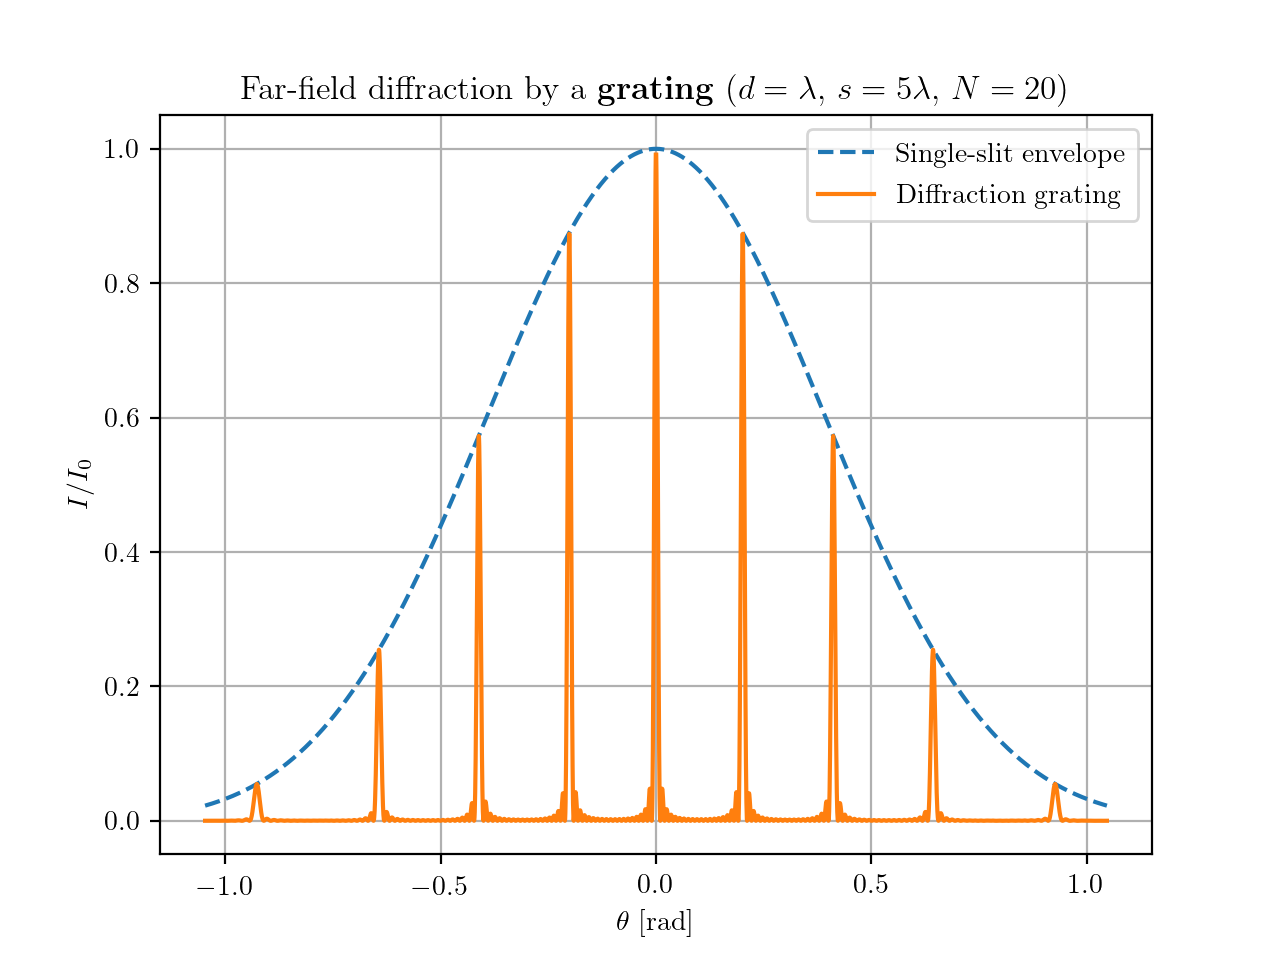

<IPython.core.display.Javascript object>


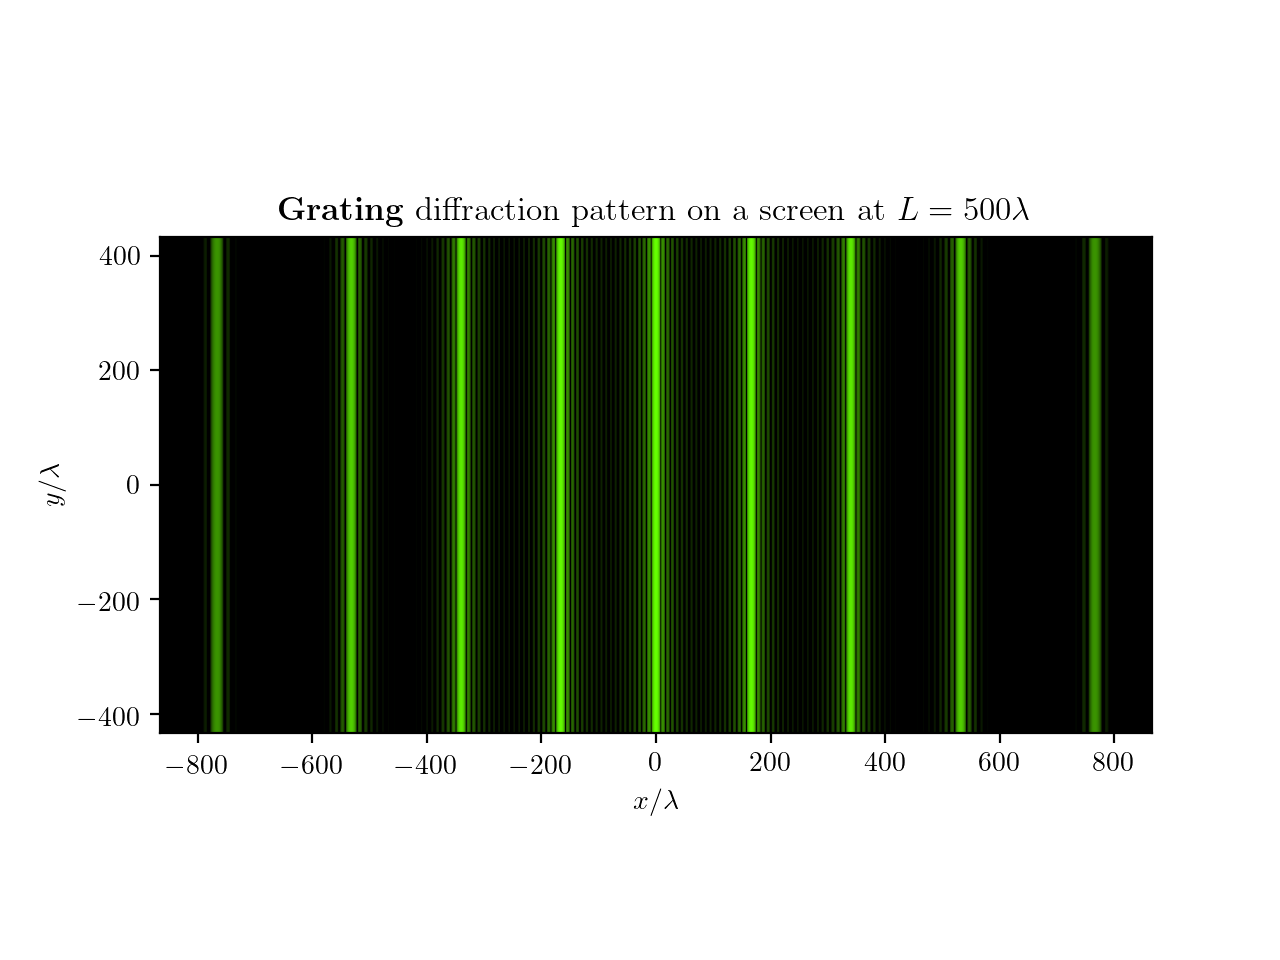

In [13]:
# Plot of the intensity profile
lamb = 1
d = 1 * lamb
s = 5 * lamb
L = 500 * lamb    # Distance of the screen to the diffracting object
N = 20

theta = np.linspace(-np.pi/3, np.pi/3, 4001)
x_screen = np.linspace(np.tan(-np.pi/3), np.tan(np.pi/3) , 4001) * L

I0 = 1
I = I0 * (np.sinc(d * np.sin(theta) / lamb))**2 * np.sin(np.pi * N * s * np.sin(theta) / lamb)**2 / \
    (N * np.sin(np.pi * s * np.sin(theta) / lamb))**2

envelope = I0 * (np.sinc(d * np.sin(theta) / lamb))**2

plt.figure()
plt.plot(theta, envelope / I0, linestyle='--', label='Single-slit envelope')
plt.plot(theta, I / I0, label='Diffraction grating')
plt.ylabel('$I / I_0$')
plt.xlabel(r'$\theta$ [rad]')
plt.title(r'Far-field diffraction by a \textbf{grating} ($d=\lambda$, $s=5\lambda$, $N=20$)')
plt.legend()
plt.grid()
#plt.savefig('grating_intensity.pdf')

# Plot of what you actually see on the screen
matrix_intensity = np.outer(np.ones((1,2000)), I)
plt.figure()
plt.imshow(matrix_intensity, cmap=my_cm, origin='lower', interpolation='None', norm=LogNorm(vmin=0.0001, vmax=1))
plt.show()

# Plot the image with a log normalization to imitate what the eyes actually see
plt.imshow(matrix_intensity / I0, cmap=my_cm, origin='lower', interpolation='None', norm=LogNorm(vmin=0.001, vmax=1), 
           extent = [np.min(x_screen) / lamb, np.max(x_screen) / lamb, 0.5 * np.min(x_screen) / lamb, 
                     0.5 * np.max(x_screen) / lamb])

plt.title(r'\textbf{Grating} diffraction pattern on a screen at $L=500\lambda$')
plt.xlabel(r'$x/\lambda$')
plt.ylabel(r'$y/\lambda$')
plt.show()

<IPython.core.display.Javascript object>


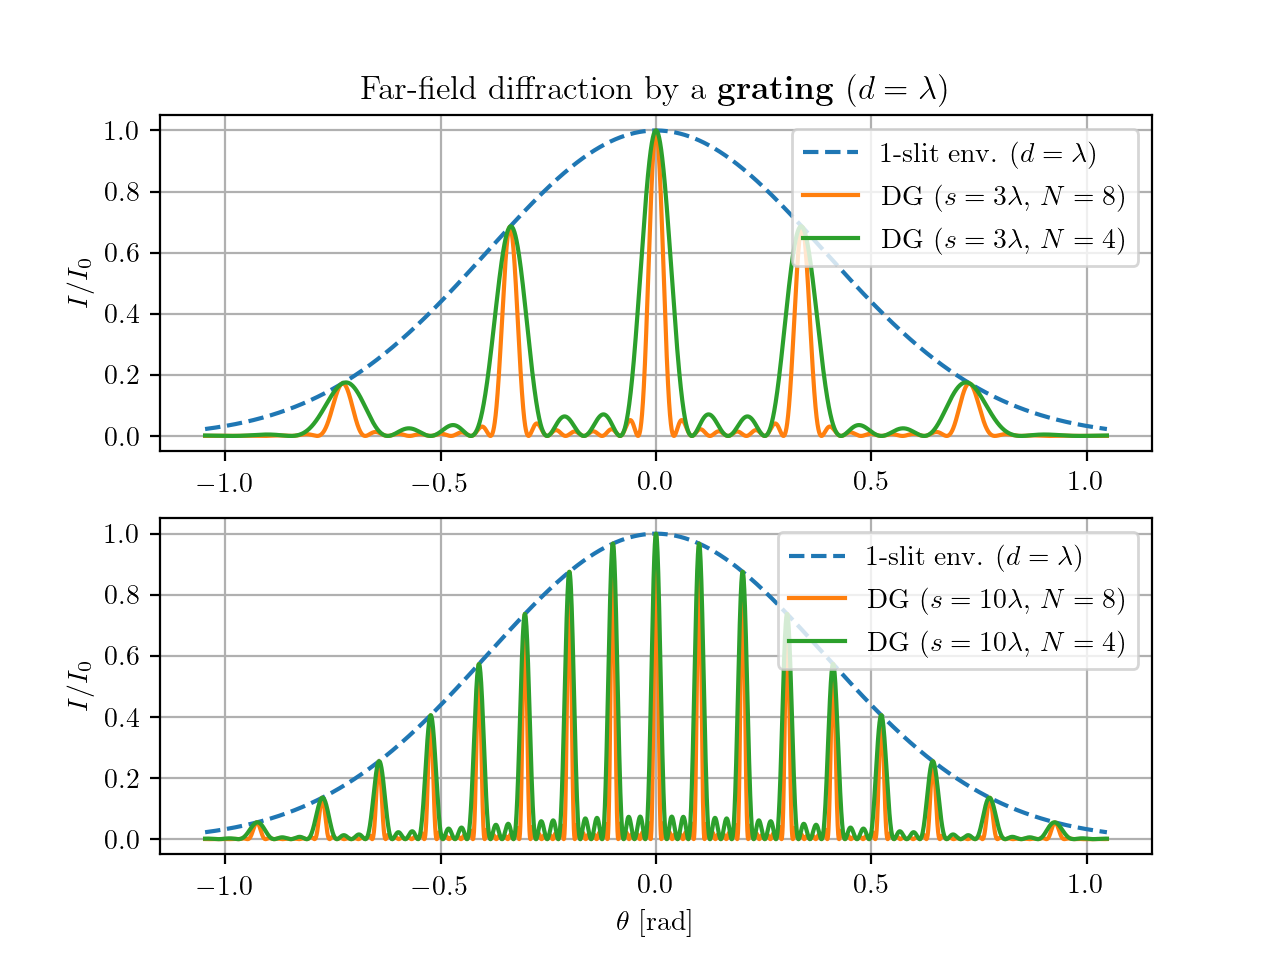

In [12]:
# Comparison varying some of the parameters
lamb = 1
d = 1 * lamb
s1 = 3 * lamb
s2 = 10 * lamb
N1 = 8
N2 = 4

theta = np.linspace(-np.pi/3, np.pi/3, 5002)

I0 = 1

I11 = I0 * (np.sinc(d * np.sin(theta) / lamb))**2 * np.sin(np.pi * N1 * s1 * np.sin(theta) / lamb)**2 / \
      (N1 * np.sin(np.pi * s1 * np.sin(theta) / lamb))**2
I12 = I0 * (np.sinc(d * np.sin(theta) / lamb))**2 * np.sin(np.pi * N1 * s2 * np.sin(theta) / lamb)**2 / \
      (N1 * np.sin(np.pi * s2 * np.sin(theta) / lamb))**2
I21 = I0 * (np.sinc(d * np.sin(theta) / lamb))**2 * np.sin(np.pi * N2 * s1 * np.sin(theta) / lamb)**2 / \
      (N2 * np.sin(np.pi * s1 * np.sin(theta) / lamb))**2
I22 = I0 * (np.sinc(d * np.sin(theta) / lamb))**2 * np.sin(np.pi * N2 * s2 * np.sin(theta) / lamb)**2 / \
      (N2 * np.sin(np.pi * s2 * np.sin(theta) / lamb))**2

envelope = I0 * (np.sinc(d * np.sin(theta) / lamb))**2

plt.figure()
ax1 = plt.subplot(2, 1, 1)
plt.plot(theta, envelope / I0, linestyle='--', label='1-slit env. ($d=\lambda$)')
plt.plot(theta, I11 / I0, label=r'DG ($s=3\lambda$, $N=8$)')
plt.plot(theta, I21 / I0, label=r'DG ($s=3\lambda$, $N=4$)')

plt.ylabel('$I / I_0$')
plt.title(r'Far-field diffraction by a \textbf{grating} ($d=\lambda$)')
plt.legend()
plt.grid()

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(theta, envelope / I0, linestyle='--', label='1-slit env. ($d=\lambda$)')
plt.plot(theta, I12 / I0, label=r'DG ($s=10\lambda$, $N=8$)')
plt.plot(theta, I22 / I0, label=r'DG ($s=10\lambda$, $N=4$)')

plt.ylabel('$I / I_0$')
plt.xlabel(r'$\theta$ [rad]')
plt.legend()
plt.grid()
plt.show()
#plt.savefig('grating_comparison.pdf')

## Estimate the step of the grating 
We can use the linear relation for the maxima positions

\begin{equation}
\frac{1}{\lambda}\sin(\theta)= \frac{1}{s}j \qquad\mbox{where}\qquad j =0, \pm 1, \pm 2, \ldots 
\end{equation}

<IPython.core.display.Javascript object>


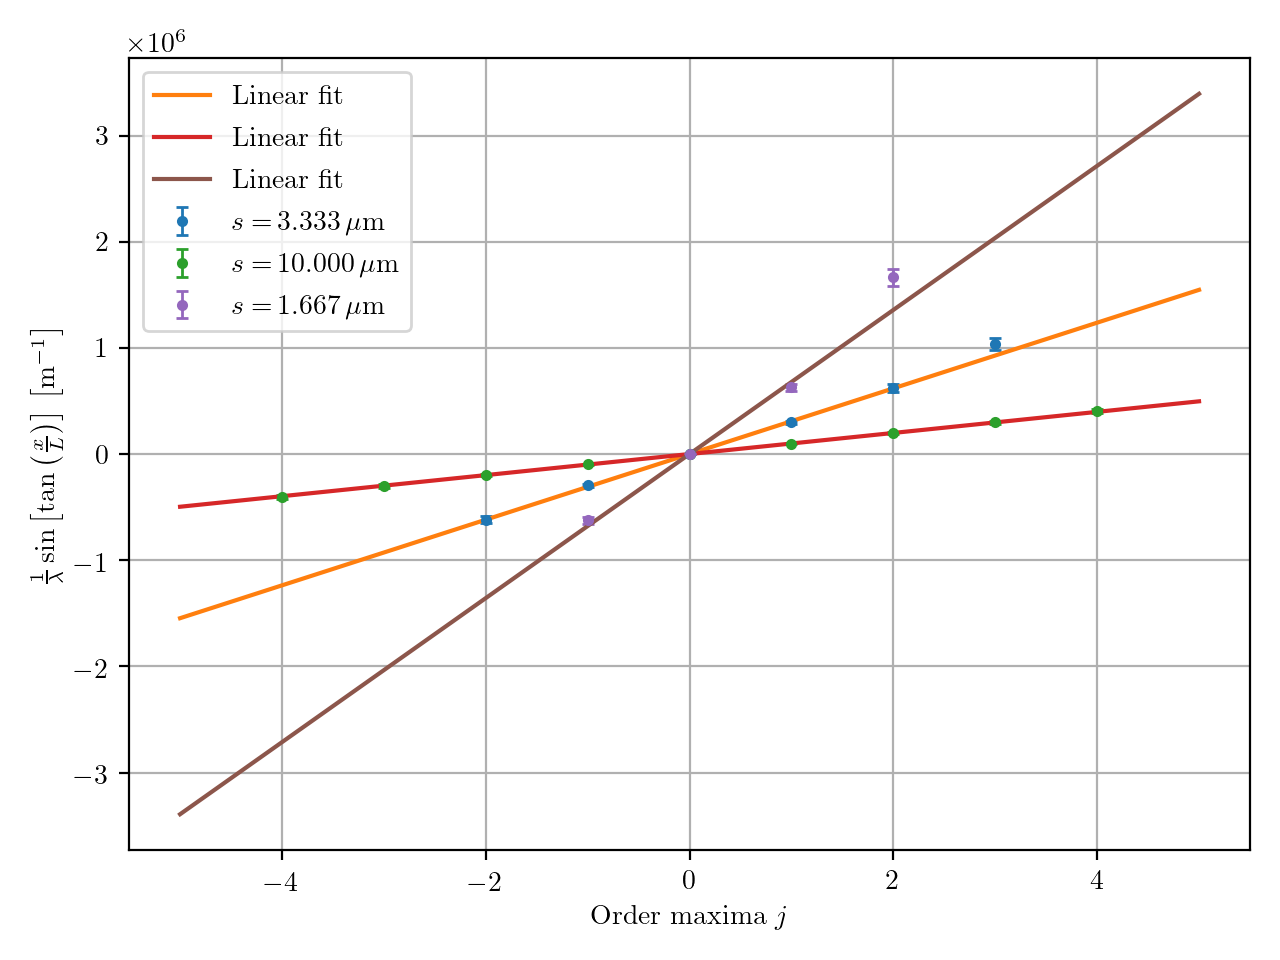

In [11]:
# Gratings
nominal_lamb = 532.4e-9    # [m]  nominal wavelength
L = 137 * 1e-2    # [m] distance from the screeen
err_L = 0.5e-2    # [m]
s_array = 1e-3 * np.array([1/300, 1/100, 1/600])    # [m] array with the widths of the slits

order_max_array = [np.arange(-2, 4), np.arange(-4, 5), np.arange(-1, 3)]    # array of the order of the diffraction minima

x_array = [np.array([-0.443, -0.215, 0, 0.216, 0.446, 0.726]), 
           np.array([-0.294, -0.218, -0.144, -0.0715, 0, 0.071, 0.143, 0.217, 0.292]),
           np.array([-0.448, 0, 0.45, 1.135])]    # [m] array of positions on the screen
err_x = 1e-3    # [m]

# This is the quantity that we want to fit
y_values = [1/nominal_lamb * np.sin(np.tan(x_array[i] / L)) for i in range(len(s_array))]
err_y = [1/nominal_lamb * np.sqrt(((np.cos(np.tan(x_array[i] / L))/np.cos(x_array[i] / L)**2) / L)**2 * err_x**2 + 
         + ((x_array[i] * np.cos(np.tan(x_array[i] / L)) /  np.cos(x_array[i]/L)**2) / L**2) ** 2 * err_L) 
         for i in range(len(s_array))]

popt_array = []
pcov_array = []

plt.figure()
for i in range(len(s_array)):
    plt.errorbar(order_max_array[i], y_values[i], yerr=err_y[i], marker='.', capsize=2, 
                 elinewidth=1, markeredgewidth=1, linestyle='', label=r'$s=\,$%.3f$\,\mu\mbox{m}$' % (1e6 * s_array[i]))

    popt, pcov = np.polyfit(order_max_array[i], y_values[i], 1, w=1/err_y[i], cov='unscaled')
    
    popt_array.append(popt)
    pcov_array.append(pcov)

    plt.plot(np.linspace(-5, 5), popt[0] * np.linspace(-5, 5) + popt[1], label='Linear fit')

plt.xlabel(r'Order maxima $j$')
plt.ylabel(r'$\frac{1}{\lambda}\sin\left[\tan\left(\frac{x}{L}\right)\right]$ $\left[\mbox{m}^{-1}\right]$')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
print('************************ RESULTS ***********************\n')
for i in range(len(popt_array)):
    print('+++++++++++++++++++++++ Grating %d ++++++++++++++++++++++' % i)
    print('The optimal parameters (with 68% confidence) are:')
    print('Grating step [lines / m]:  %e +/- %e' % (popt_array[i][0], np.sqrt(pcov_array[i][0,0])))
    print('Nominal value [lines / m]: %.0f\n' % (1/s_array[i]))

************************ RESULTS ***********************

+++++++++++++++++++++++ Grating 0 ++++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Grating step [lines / m]:  3.092819e+05 +/- 7.381148e+03
Nominal value [lines / m]: 300000

+++++++++++++++++++++++ Grating 1 ++++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Grating step [lines / m]:  9.929882e+04 +/- 1.847880e+03
Nominal value [lines / m]: 100000

+++++++++++++++++++++++ Grating 2 ++++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Grating step [lines / m]:  6.785595e+05 +/- 2.044213e+04
Nominal value [lines / m]: 600000



# Measuring unknown objects
Diffraction pattern is the same as the single slit according to *Babinet's principle* (except for the intensity in the forward direction). 

The minima of diffraction are found again at

\begin{equation}
    \mbox{Minima:}\qquad \frac{d \sin(\theta)}{\lambda} = j\qquad\mbox{where}\qquad j =0, \pm 1, \pm 2, \ldots 
\end{equation}

Therefore one can recover the width $d$ of the obstacle with the following linear relation

\begin{equation}
    \frac{1}{\lambda}\sin(\theta) = \frac{1}{d}\,j\qquad \longrightarrow \qquad \underbrace{\frac{1}{\lambda}\sin\left[\tan\left(\frac{x}{L}\right)\right]}_y = \frac{1}{d}\,j
\end{equation}

We decided to use this formulation so to have the quantity with the uncertainties on the $y$-axis.
The width $d$ of the obstacle can be obtained as the inverse of slope of the linear fit.

<IPython.core.display.Javascript object>


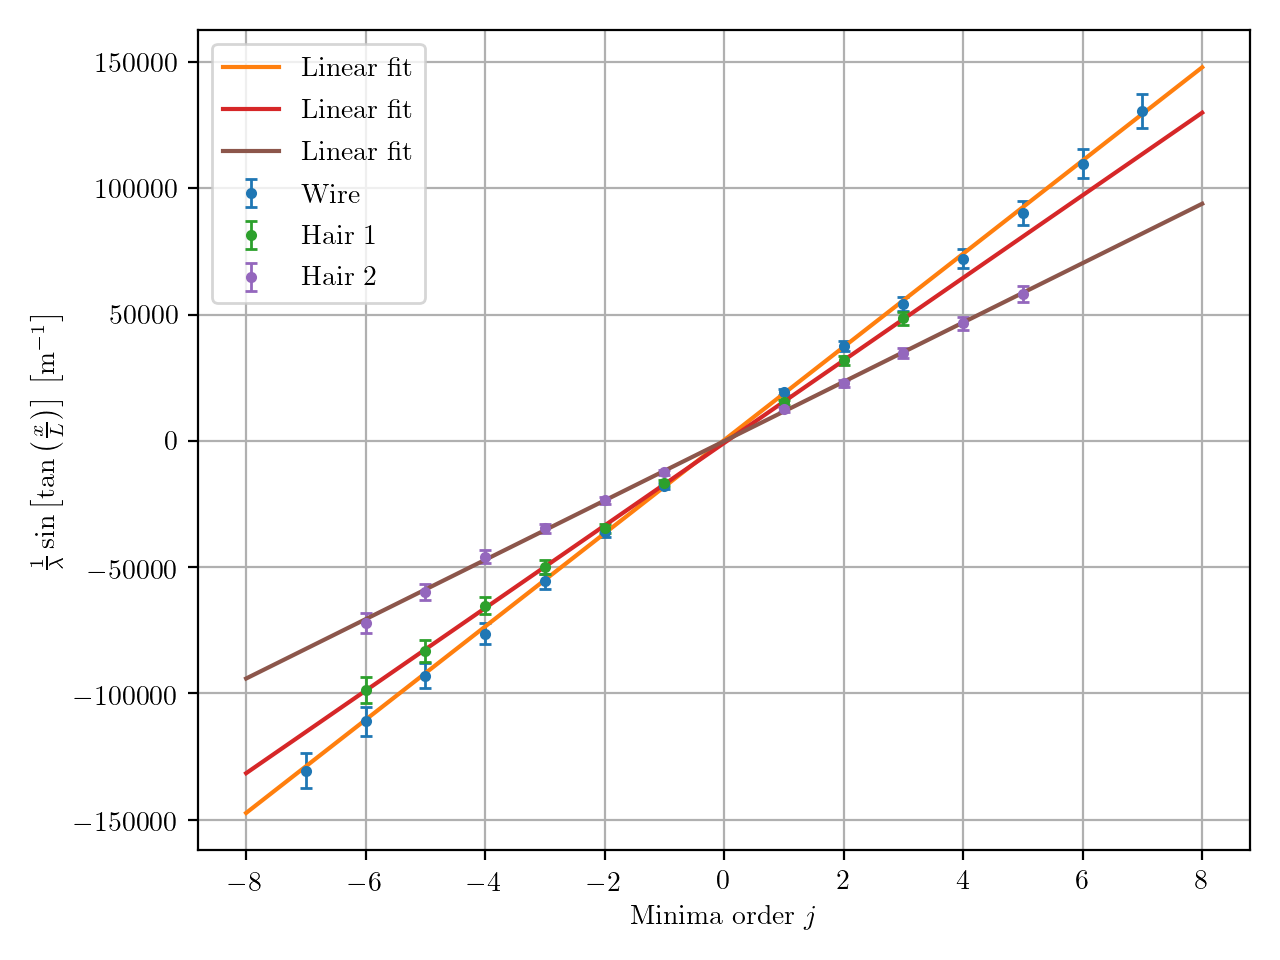

In [9]:
L = 135.3 * 1e-2    # [m] distance to the screen
err_L = 0.5e-2    # [m]

nominal_lamb = 532.4e-9    # [m] nominal wavelength

# Thin wire
nominal_d = 0.05e-3    # [m] nominal width
order_minima_wire = np.arange(-7, 8)
order_minima_wire = order_minima_wire[order_minima_wire != 0]    # remove order 0 which is hard to see

minima_wire = 1e-2 * np.array([-9.4, -8, -6.7, -5.5, -4, -2.6, -1.3, 1.4, 2.7, 3.9, 5.2, 6.5, 7.9, 9.4])    # [m]

# Hair 1
order_minima_hair1 = np.arange(-6, 4)
# remove order 0
order_minima_hair1 = order_minima_hair1[order_minima_hair1 != 0]    

minima_hair1 = 1e-2 * np.array([-7.1, -6, -4.7, -3.6, -2.5, -1.2, 1.1, 2.3, 3.5])    # [m]

# Hair 2
order_minima_hair2 = np.arange(-6, 6)

# remove order 0
order_minima_hair2 = order_minima_hair2[order_minima_hair2 != 0]    
minima_hair2 = 1e-2 * np.array([-5.2, -4.3, -3.3, -2.5, -1.7, -0.9, 0.9, 1.65, 2.5, 3.35, 4.2])    # [m]

# Error on minima position
err_minima = 0.5e-3    # [m]

# Collect all data in a set of arrays
order_minima_array =[order_minima_wire, order_minima_hair1, order_minima_hair2]
minima_array = [minima_wire, minima_hair1, minima_hair2]
labels = ['Wire', 'Hair 1', 'Hair 2']

# Compute y quantity and its uncertainty
# This is the quantity that we want to fit
y_values = [1/nominal_lamb * np.sin(np.tan(minima_array[i] / L)) for i in range(len(minima_array))]
err_y = [1/nominal_lamb * np.sqrt(((np.cos(np.tan(minima_array[i] / L))/np.cos(minima_array[i] / L)**2) / L)**2 \
                                  * err_minima**2 + ((minima_array[i] * np.cos(np.tan(minima_array[i] / L)) /  \
                                    np.cos(minima_array[i]/L)**2) / L**2) ** 2 * err_L) 
         for i in range(len(minima_array))]

# Fit figure
popt_array = []
pcov_array = []

plt.figure()
for i in range(len(minima_array)):
    plt.errorbar(order_minima_array[i], y_values[i], yerr=err_y[i], marker='.', capsize=2, 
                 elinewidth=1, markeredgewidth=1, linestyle='', label=labels[i])

    popt, pcov = np.polyfit(order_minima_array[i], y_values[i], 1, w=1/err_y[i], cov='unscaled')
    
    popt_array.append(popt)
    pcov_array.append(pcov)
   
    plt.plot(np.linspace(-8, 8), popt[0] * np.linspace(-8, 8) + popt[1], label='Linear fit')

plt.xlabel(r'Minima order $j$')
plt.ylabel(r'$\frac{1}{\lambda}\sin\left[\tan\left(\frac{x}{L}\right)\right]$ $\left[\mbox{m}^{-1}\right]$')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
print('******************** RESULTS ********************\n')
for i in range(len(popt_array)):
    print('+++++++++++++++++++ Object %d ++++++++++++++++++++' % i)
    print('The optimal parameters (with 68% confidence) are:')
    print('Width [m]: %e +/- %e\n' % (1 / popt_array[i][0], np.sqrt(pcov_array[i][0,0]) / popt_array[i][0]**2))

******************** RESULTS ********************

+++++++++++++++++++ Object 0 ++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Width [m]: 5.417152e-05 +/- 7.909018e-07

+++++++++++++++++++ Object 1 ++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Width [m]: 6.115417e-05 +/- 1.164902e-06

+++++++++++++++++++ Object 2 ++++++++++++++++++++
The optimal parameters (with 68% confidence) are:
Width [m]: 8.507930e-05 +/- 1.491608e-06

